In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#Funciones
def f(time, r, A, B):
    V = r[0]
    X = r[1]
    return np.array([- B*V - A*X, V])

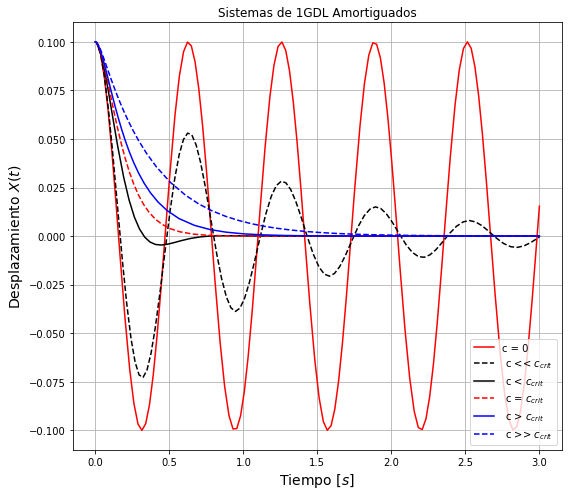

In [3]:
#Constantes nominales del problema
m = 50.0
k = 5000.0
tf = 3.0 #tiempo final de simulación medida en segundos
initial_conditions = [0, 0.1] #[velocidad inicial, desplazamiento inicial]

#Constantes de amortiguamiento 
c1 = 0.0 #No amortiguado
c2 = 100 # c << c_critico
c3 = 700 # c < c_critico
c4 = 1000 # c = c_critico
c5 = 1300 # c > c_critico
c6 = 2000 # c >> c_critico

C = [c1, c2, c3, c4, c5, c6]

#Constantes de la EDG
A = k / m
B = []

for c in C:
    B.append(c/m)

#Resolvemos numéricamente las EDG
x1 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[0]], method='RK45', rtol=1e-8)
x2 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[1]], method='RK45', rtol=1e-8)
x3 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[2]], method='RK45', rtol=1e-8)
x4 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[3]], method='RK45', rtol=1e-8)
x5 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[4]], method='RK45', rtol=1e-8)
x6 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[5]], method='RK45', rtol=1e-8)

#Graficamos
fig, ax = plt.subplots(figsize=(8, 7), tight_layout=True)

#Modelos
ax.plot(x1.t, x1.y[1], 'r') #Modelo No amortiguaod
ax.plot(x2.t, x2.y[1], 'k', linestyle='dashed') #Modelo Amortiguado c << c_critico 
ax.plot(x3.t, x3.y[1], 'k') #Modelo Amortiguado c < c_critico 
ax.plot(x4.t, x4.y[1], 'r', linestyle='dashed') #Modelo Amortiguado c = c_critico 
ax.plot(x5.t, x5.y[1], 'b') #Modelo Amortiguado c > c_critico 
ax.plot(x6.t, x6.y[1], 'b', linestyle='dashed') #Modelo Amortiguado c >> c_critico 

ax.grid(True)
ax.set_title("Sistemas de 1GDL Amortiguados")
ax.set_ylabel(r"Desplazamiento $X(t)$", fontsize=14)
ax.set_xlabel(r"Tiempo $[s]$", fontsize=14)
ax.legend(['c = 0', r' c << $c_{crit}$', r' c < $c_{crit}$', 
           r' c = $c_{crit}$', r' c > $c_{crit}$', 
           r' c >> $c_{crit}$'], loc='lower right')
plt.show()

scipy.integrate._ivp.ivp.OdeResult

In [20]:
type(x2.y[0])

numpy.ndarray